In [11]:
from matplotlib import pyplot
import numpy as np
import struct
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from hardposit import from_double, from_bits
import math
pyplot.rcParams['figure.figsize'] = [20, 10]


In [10]:
bits16_range = range(0,2**16)
bits8_range = range(0,2**8)

def formatOnNBits(integer,nbits):
    return f"{integer:b}".zfill(nbits)


In [4]:
posit16_arr = [from_bits(bits,16,2) for bits in bits16_range]
posit160_arr = [from_bits(bits,16,0) for bits in bits16_range]


posit8_arr = [from_bits(bits,8,2) for bits in bits8_range]
posit80_arr = [from_bits(bits,8,0) for bits in bits8_range]
posit81_arr = [from_bits(bits,8,1) for bits in bits8_range]

real16_arr = [posit.eval() for posit in posit16_arr]
real160_arr = [posit.eval() for posit in posit160_arr]


real8_arr = [posit.eval() for posit in posit8_arr]
real80_arr = [posit.eval() for posit in posit80_arr]
real81_arr = [posit.eval() for posit in posit81_arr]

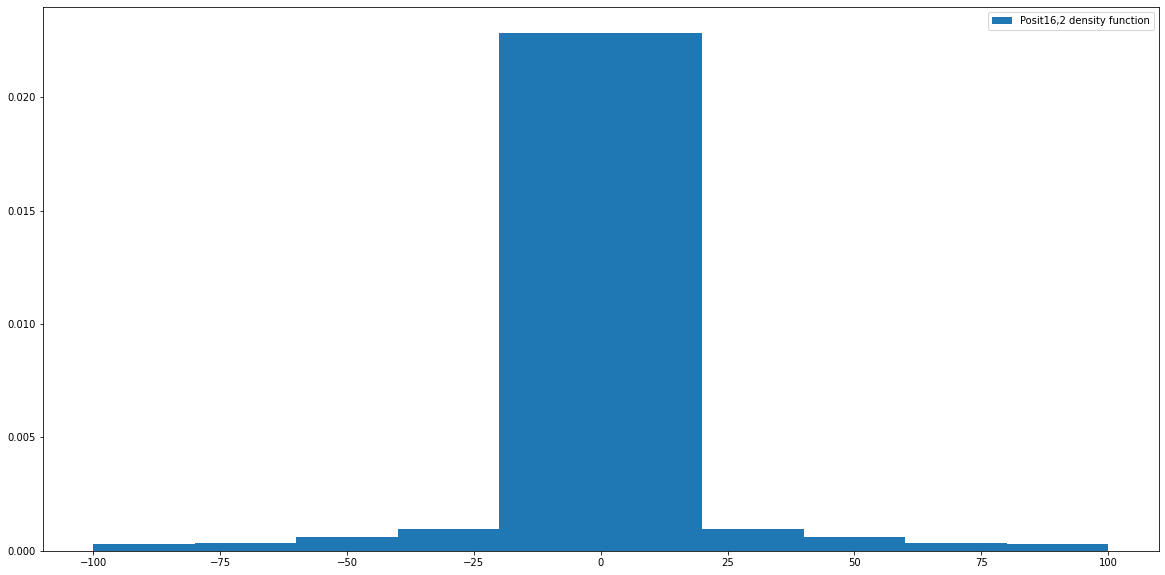

In [31]:
pyplot.hist(real16_arr, range=(-100,100), density=True, label="Posit16,2 density function")
pyplot.legend()

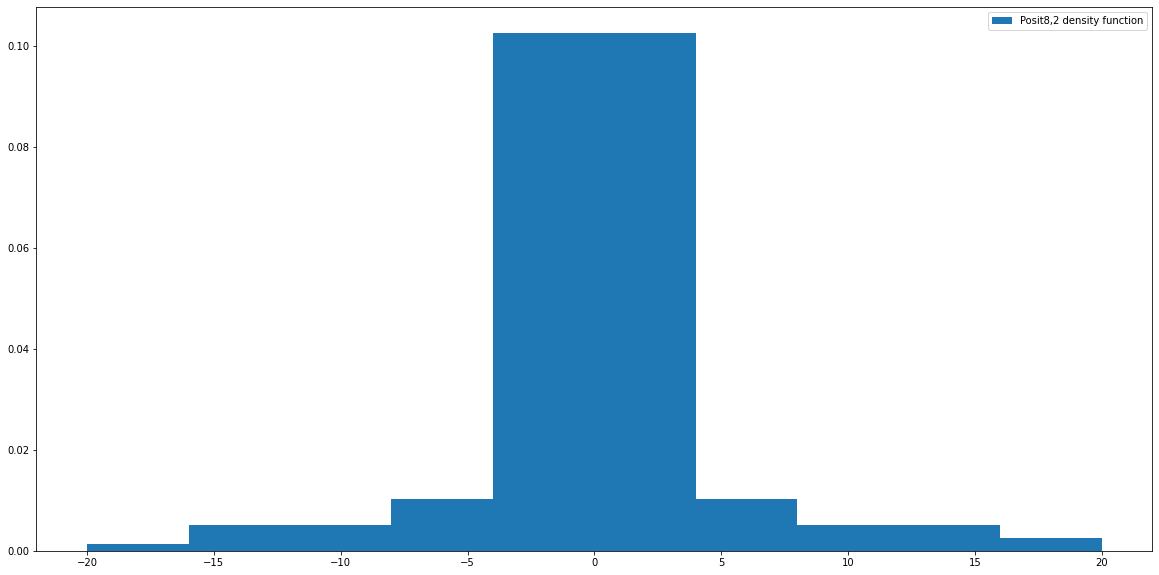

In [32]:
pyplot.hist(real8_arr, range=(-20,20), density=True, label="Posit8,2 density function")
pyplot.legend();

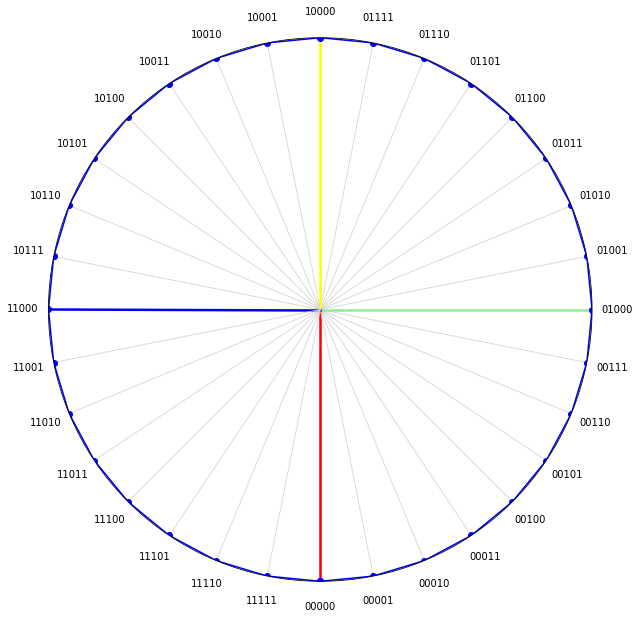

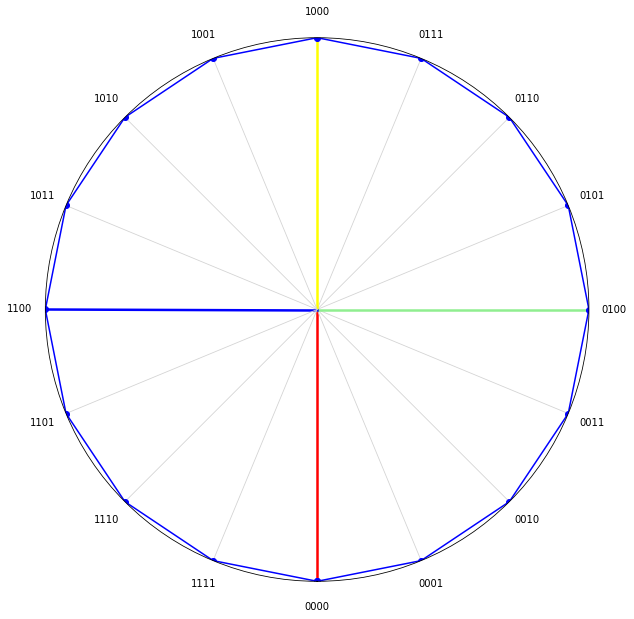

In [33]:
def plotRing(nbits):
    maxInt = 2**nbits
    bits_integers = (np.arange(0,maxInt))
    bits_range = 2 * np.pi * bits_integers / maxInt
    bits_strings = [formatOnNBits(integer,nbits) for integer in bits_integers]
    r = 2*np.ones(maxInt)
    theta = np.arange(0,2*np.pi,2*np.pi/r.shape[0])
    
    # Add closing segment
    theta = np.append(theta, 2*np.pi)
    r = np.append(r, 2)
    
    fig, ax = pyplot.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r, marker='o', color='b')
    ax.set_rmax(2)
    ax.set_xticks(bits_range)
    ax.set_xticklabels(bits_strings)
    ax.set_theta_zero_location('S')

    ax.set_rticks([])  # Less radial ticks
    ax.grid(True)
    ax.tick_params(axis='both', which='major', pad=15)
    
    for gridline in ax.xaxis.get_gridlines():
        gridline.set_color('lightgray')
    
    ax.xaxis.get_gridlines()[0].set_color('red')
    ax.xaxis.get_gridlines()[0].set_linewidth(2.5)

    ax.xaxis.get_gridlines()[2**(nbits - 1)].set_color('yellow')
    ax.xaxis.get_gridlines()[2**(nbits - 1)].set_linewidth(2.5)

    ax.xaxis.get_gridlines()[2**(nbits - 2)].set_color('lightgreen')
    ax.xaxis.get_gridlines()[2**(nbits - 2)].set_linewidth(2.5)

    ax.xaxis.get_gridlines()[3 * 2**(nbits - 2)].set_color('blue')
    ax.xaxis.get_gridlines()[3 * 2**(nbits - 2)].set_linewidth(2.5)




    pyplot.show()
    
plotRing(5);
plotRing(4)

In [34]:
resolution8 = np.ediff1d(real8_arr)
resolution80 = np.ediff1d(real80_arr)
resolution81 =  np.ediff1d(real81_arr)

resolution16 = np.ediff1d(real16_arr)

In [8]:
@interact(xlim=1.5,ylim=0.2)
def plot(xlim,ylim):
    fig, ax = pyplot.subplots()
    ax.plot(real8_arr[1:],resolution8,label="Posit8,2 resolution")
    ax.plot(real81_arr[1:],resolution81,label="Posit8,1 resolution",color="red")
    ax.plot(real81_arr[1:],resolution80, label="Posit8,0 resolution")
    ax.set_ylabel("Resolution")
    ax.set_xlabel("Real value")
    ax.legend(prop={'size': 20})
    ax.set_xlim(-xlim,xlim)
    ax.set_ylim(0,ylim);

interactive(children=(FloatSlider(value=1.5, description='xlim', max=4.5, min=-1.5), FloatSlider(value=0.2, de…

In [9]:
def getFracLen(posit):
    try:
        reg_len = posit.fields.unwrap().regime.reg_len
        exp_len = min(posit.es, posit.size - reg_len - 1)
        return posit.size - exp_len - reg_len - 1
    except:
        return 0
    
def getExpReg(posit):
    try:
        reg = posit.fields.unwrap().regime.k
        exp = posit.fields.unwrap().exp
        return reg,exp, reg*(2**(posit.es)) + exp
    except:
        return float('nan'),float('nan'),float('nan')
    
def getMaxFracRegion(nbits,esbits):
    useed = 2**(2**esbits)
    lbound = 1/useed
    rnextbound = from_double(useed,nbits,esbits)
    rbound = from_bits(rnextbound.to_bits()-1,nbits,esbits)
    return [-rbound.eval(),-lbound]

def getEpsilonAroundOne(nbits,esbits):
    one = from_double(1.0,nbits,esbits)
    nextOne = from_bits(one.to_bits()+1,nbits,esbits)
    return (nextOne - one)


In [10]:
fracs80 = [getFracLen(posit) for posit in posit80_arr]
fracs81 = [getFracLen(posit) for posit in posit81_arr]
fracs82 = [getFracLen(posit) for posit in posit8_arr]

In [11]:
print(getMaxFracRegion(8,0))
print(getMaxFracRegion(8,1))
print(getMaxFracRegion(8,2))
print("")
print(getMaxFracRegion(16,0))
print(getMaxFracRegion(16,1))
print(getMaxFracRegion(16,2))
print("")
print(getMaxFracRegion(32,0))
print(getMaxFracRegion(32,1))
print(getMaxFracRegion(32,2))

[-1.96875, -0.5]
[-3.875, -0.25]
[-15.0, -0.0625]

[-1.9998779296875, -0.5]
[-3.99951171875, -0.25]
[-15.99609375, -0.0625]

[-1.9999999981373549, -0.5]
[-3.9999999925494194, -0.25]
[-15.999999940395355, -0.0625]


| nbits | esbits | lower | upper |
|-------|--------|-------|-------|
|8|0|0.5|1.96875|

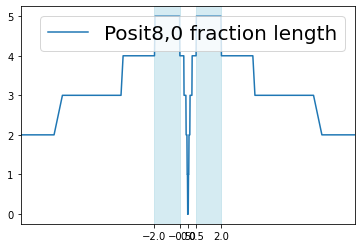

In [12]:
fig, ax = pyplot.subplots()
ax.plot(real80_arr,fracs80,label="Posit8,0 fraction length")
ax.legend(prop={'size': 20})
ax.axvspan(-2,-0.5,color='lightblue', alpha=0.5)
ax.axvspan(0.5,2,color='lightblue', alpha=0.5)
ax.set_xticks(list(ax.get_xticks()) + [-2,-0.5,0.5,2])
ax.set_xlim(-10,10);



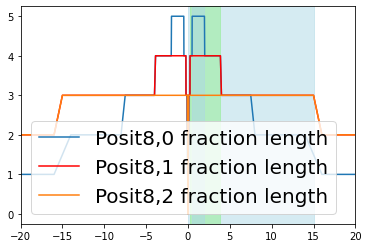

In [13]:
fig, ax = pyplot.subplots()
ax.plot(real80_arr,fracs80,label="Posit8,0 fraction length")
ax.plot(real81_arr,fracs81,label="Posit8,1 fraction length", color="red")
ax.plot(real8_arr,fracs82,label="Posit8,2 fraction length")

ax.set_xlim(-20,20);
ax.legend(prop={'size': 20})
ax.axvspan(1/16,15,color='lightblue', alpha=0.5)
ax.axvspan(1/4,3.875,color='lightgreen', alpha=0.5)
ax.axvspan(0.5,1.96875,color='lightblue', alpha=0.5);








In [14]:
@interact
def plotDensity(bin_upper=5.0): 
    fig, ax = pyplot.subplots()
    step = bin_upper/50
    ax.hist(real81_arr,density=True, label="Posit8,1 density function",bins=np.arange(-bin_upper,bin_upper+step,step), ls='dotted', lw=3, fc=(1, 0, 0, 0.2));
    ax.hist(real8_arr,density=True, label="Posit8,2 density function",bins=np.arange(-bin_upper,bin_upper+step,step), ls='dotted', lw=3, fc=(0, 1, 0, 0.2));
    ax.hist(real80_arr,density=True, label="Posit8,0 density function",bins=np.arange(-bin_upper,bin_upper+step,step), ls='dashed', lw=3, fc=(0, 0, 1, 0.2));
    
    ax.legend(prop={'size': 20});




interactive(children=(FloatSlider(value=5.0, description='bin_upper', max=15.0, min=-5.0), Output()), _dom_cla…

(0.5, 1.0)

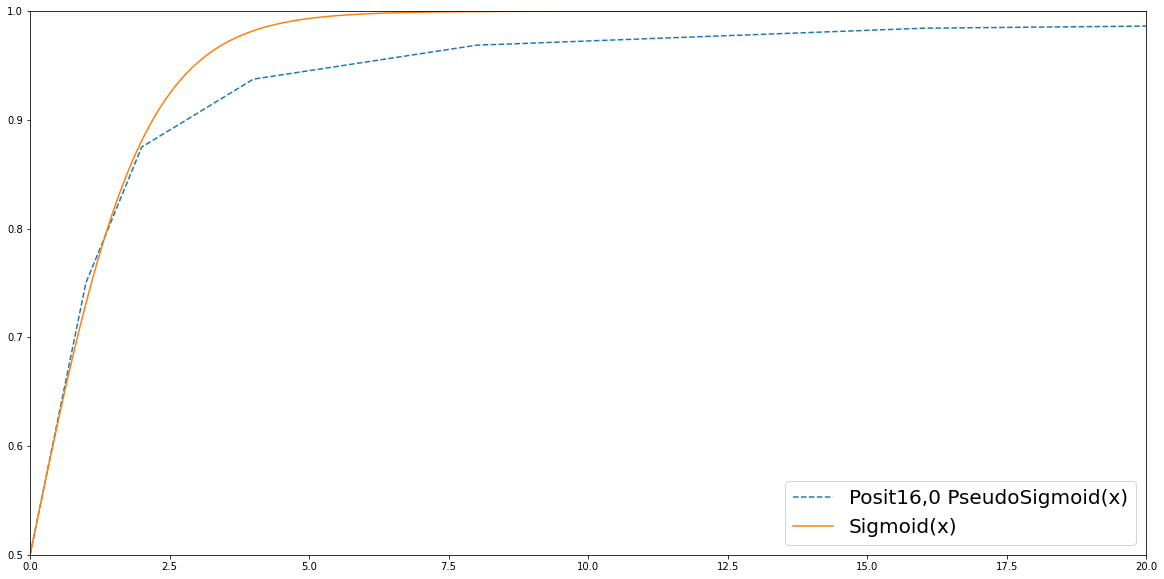

In [18]:
def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))

def pseudosigmoid(X):
    return (2**(16 - 2) + (X>>1))>>1

def tanh(x):
    return np.tanh(x)

def elu(x):
        if x >= 0:
            return x
        return math.exp(x) - 1

def pseudotanh(x):
    argg = from_double(2*x,16,0).to_bits()
    psb = pseudosigmoid(argg)
    return (2*from_bits(psb,16,0).eval()-1)

def pseudoelu(x):
    argg = from_double(-x,16,0).to_bits()
    psb = pseudosigmoid(argg)
    psf = from_bits(psb,16,0).eval()
    return 2*(1/(2*psf) - 1)

def pseudoinv(x):
    argg = from_double(x,16,0)
    X = argg.to_bits()
    invbits =  (X ^ (2**(16 - 1) - 1)) + 1
    return from_bits(invbits,16,0).eval()

rr = np.arange(0,200,0.1)
pp = [from_double(r,16,0) for r in rr]
pb = [p.to_bits() for p in pp]

maxB = 2**16 * np.ones(len(rr))
fig, ax = pyplot.subplots()

spb = (pb/(maxB) + 1/2)
spbalt = [from_bits(pseudosigmoid(X),16,0).eval() for X in pb]

thpbalt = [pseudotanh(r) for r in rr]
spbi = 1-spb

ax.plot(rr,spbalt, label="Posit16,0 PseudoSigmoid(x)",linestyle='dashed')
ax.plot(rr,sigmoid(rr), label="Sigmoid(x)")
ax.legend(prop={'size': 20})
ax.set_xlim([0,20])
ax.set_ylim([0.5,1])




(0.0, 1.0)

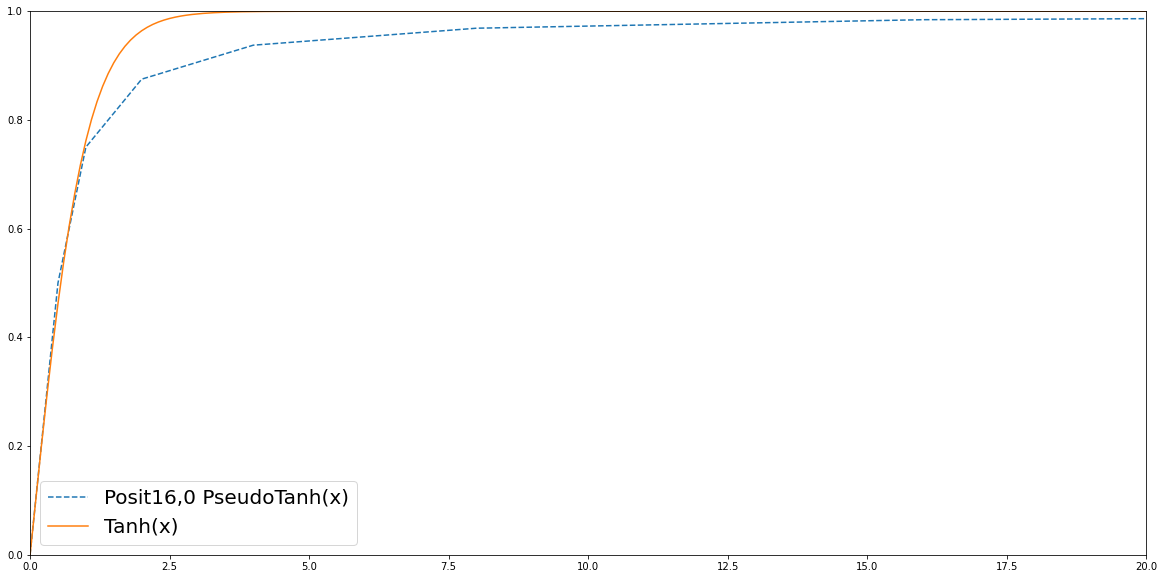

In [279]:
fig, ax = pyplot.subplots()
ax.plot(rr,thpbalt, label="Posit16,0 PseudoTanh(x)",linestyle='dashed')
ax.plot(rr,tanh(rr), label="Tanh(x)")
ax.legend(prop={'size': 20})
ax.set_xlim([0,20])
ax.set_ylim([0,1])



(-1.0, 0.0)

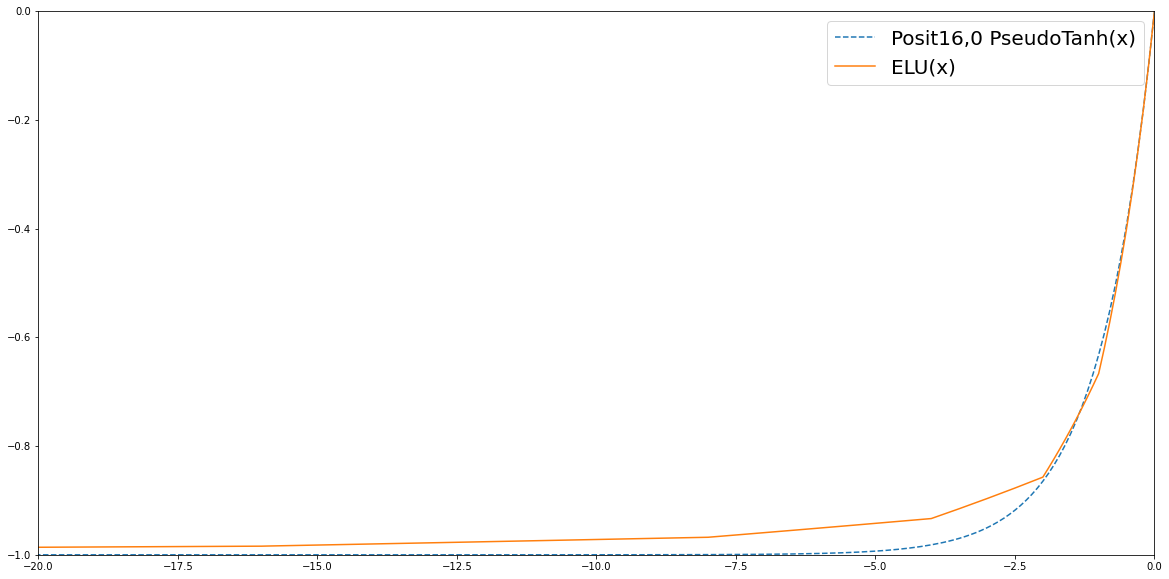

In [15]:
rrr = -np.array(rr)
elus = [elu(x) for x in rrr]
elpbalt = [pseudoelu(r) for r in rrr]


fig, ax = pyplot.subplots()
ax.plot(rrr,elus, label="Posit16,0 PseudoTanh(x)",linestyle='dashed')
ax.plot(rrr,elpbalt, label="ELU(x)")
ax.legend(prop={'size': 20})
ax.set_xlim([-20,0])
ax.set_ylim([-1,0])




(0.0, 5.0)

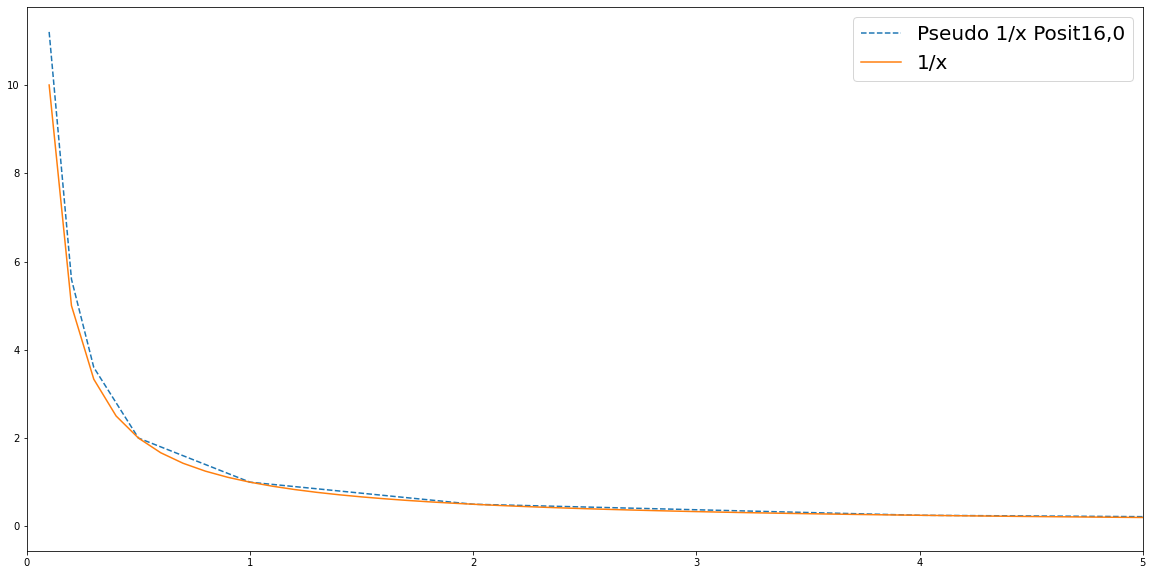

In [24]:
rrnozero = rr[rr != 0]
invex = 1/np.array(rrnozero)
invps = [pseudoinv(x) for x in rrnozero]
fig, ax = pyplot.subplots()
ax.plot(rrnozero,invps, label="Pseudo 1/x Posit16,0",linestyle='dashed')
ax.plot(rrnozero,invex, label="1/x")
ax.legend(prop={'size': 20})
ax.set_xlim([0,5])

In [208]:
val = 0.25;
assert abs(val) <= 1
p1 = from_double(val,8,0)
inv_val = 1 - p1.eval()
p2 = from_double(inv_val,8,0)

print(val,inv_val)
print(p1,p2)
print(from_bits(2**(6) - p1.to_bits(),8,0))

# 00001000
# 00111000

# 01000000

# 0001|0000
# 001|10000



0.25 0.75
P<8,0>:          0b00010000   0x10   16
                   00010000   
sign:              0
regime:            00000001 -> (reg_s, reg_len) = (0, 3) -> k = -2
mantissa:          00000000 -> 100000 Fx<1,6>(32) ⇒ 1.0
                   00010000

                   (-1) ** 0 * (2 ** -2) * (1 + 0/16)
                   0.25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 P<8,0>:          0b00110000   0x30   48
                   00110000   
sign:              0
regime:            00000001 -> (reg_s, reg_len) = (0, 2) -> k = -1
mantissa:          00010000 -> 110000 Fx<1,6>(48) ⇒ 1.5
                   00110000

                   (-1) ** 0 * (2 ** -1) * (1 + 16/32)
                   0.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

P<8,0>:          0b00110000   0x30   48
                   00110000   
sign:              0
regime:            00000001 -> (reg_s, reg_len) = (0, 2) -> k = -1
mantissa:          00010000 -> 110000 Fx<1,6>(48) ⇒ 1.5
                   00110000

       